19CSE305 - Machine Learning

# Mudra (Hand Gesture) Recognition 

## Team

1. Rithika Sri J - CB.EN.U4CSE19025  
2. Manav Patnaik  -  CB.EN.U4CSE19033 

Dataset: https://drive.google.com/drive/folders/1xpmTTwjZR8R0r2SnRPjFOZ6RpcWAA5zH?usp=sharing


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


We are building 3 CNNs and will be comparing their results later.

*   Custom CNN
*   Resnet



# Building a CNN - Convolutional Neural Network

## Importing and Loading Images

In [ ]:
%tensorflow_version 2.x

import os
import random
import glob
import shutil
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.applications import VGG19, VGG16, ResNet50
from tensorflow.keras.layers import Dense, Activation, Conv2D, Flatten, Dropout, MaxPool2D

Splitting code into **train** and **test**

In [ ]:
# for i in os.listdir('./ML_MUDRA'):
#     num_images = len(os.listdir(f'./ML_MUDRA/{i}'))
#     test_size = math.floor(num_images*0.25)
#     valid_size = test_size
#     train_size = num_images - test_size - valid_size
#     for train_img in random.sample(glob.glob(f'./ML_MUDRA/{i}/*'), train_size):
#         shutil.move(train_img, f'train/{i}')
#     for train_img in random.sample(glob.glob(f'./ML_MUDRA/{i}/*'), valid_size):
#         shutil.move(train_img, f'valid/{i}')
#     for test_img in random.sample(glob.glob(f'./ML_MUDRA/{i}/*'), test_size):
#         shutil.move(test_img, f'test/{i}/')

Image data generators

In [ ]:
train_datagenerator = ImageDataGenerator(rescale=1./255, horizontal_flip=True)
valid_datagenerator = ImageDataGenerator(rescale=1./255, horizontal_flip=True)
test_datagenerator = ImageDataGenerator(rescale=1./255)

In [ ]:
dataset_dir = '/content/drive/MyDrive/Datasets/Hand_Gesture_Recognition'

In [ ]:
# Resize images to 100x100
training_image_generator = train_datagenerator.flow_from_directory(
        dataset_dir + '/train',
        target_size=(100, 100))

validation_image_generator = valid_datagenerator.flow_from_directory(
         dataset_dir + '/valid',
        target_size=(100, 100))

testing_image_generator = test_datagenerator.flow_from_directory(
         dataset_dir + '/test',
        target_size=(100, 100))

Found 286 images belonging to 27 classes.
Found 122 images belonging to 27 classes.
Found 122 images belonging to 27 classes.


Classes recognized by Keras

In [ ]:
print('Unique classes:', training_image_generator.class_indices)

Unique classes: {'10_Kabitham': 0, '11_Kadagamugam': 1, '12_Kangula': 2, '13_Katharimugam': 3, '14_Mayuram': 4, '15_Mirgachirsha': 5, '16_Mukulam': 6, '17_Mushti': 7, '18_Padmakosha': 8, '19_Pathakam': 9, '1_Alapadmam': 10, '20_Sarpashisha': 11, '21_Shikaram': 12, '22_Shukathundam': 13, '23_Simhamugha': 14, '24_Suchi': 15, '25_Tamaraichulam': 16, '26_Thirpathakam': 17, '27_Trishulam': 18, '2_Aralam': 19, '3_Artha chandran': 20, '4_Arthapathakam': 21, '5_Brahmaram': 22, '6_Chandrakala': 23, '7_Chaturam': 24, '8_Hamsapaksham': 25, '9_Hamsasiyam': 26}


In [ ]:
train_steps = training_image_generator.n // training_image_generator.batch_size

Sample image

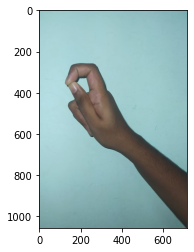

In [ ]:
img1 = image.load_img(dataset_dir + '/train/10_Kabitham/1.jpg')
plt.imshow(img1)

## Model Building

In [ ]:
model = tf.keras.Sequential([
                             Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3), padding='same'),
                             Conv2D(32, (3, 3), activation='relu', padding='same'),
                             MaxPool2D(3,3),
                             Dropout(0.25),
                             Conv2D(64, (3, 3), activation='relu', padding='same'),
                             Conv2D(64, (3, 3), activation='relu', padding='same'),
                             MaxPool2D(3,3),
                             Dropout(0.25),
                             Flatten(),
                             Dense(256, activation='relu'),
                             Dropout(0.5),
                             Dense(27, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 100, 100, 32)      896       
                                                                 
 conv2d_9 (Conv2D)           (None, 100, 100, 32)      9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 33, 33, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 33, 33, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 33, 33, 64)        18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 33, 33, 64)        36928     
                                                      

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
results = model.fit(training_image_generator, 
                              steps_per_epoch=train_steps,
                          epochs=50, validation_data=validation_image_generator)

Epoch 1/50
8/8 [==============================] - 69s 9s/step - loss: 3.3104 - accuracy: 0.0472 - val_loss: 3.2834 - val_accuracy: 0.0492
Epoch 2/50
8/8 [==============================] - 64s 8s/step - loss: 3.2510 - accuracy: 0.0472 - val_loss: 3.2213 - val_accuracy: 0.0820
Epoch 3/50
8/8 [==============================] - 63s 8s/step - loss: 3.2290 - accuracy: 0.0512 - val_loss: 3.2058 - val_accuracy: 0.0820
Epoch 4/50
8/8 [==============================] - 64s 8s/step - loss: 3.2416 - accuracy: 0.0709 - val_loss: 3.2345 - val_accuracy: 0.0820
Epoch 5/50
8/8 [==============================] - 63s 8s/step - loss: 3.1933 - accuracy: 0.0898 - val_loss: 3.1379 - val_accuracy: 0.0574
Epoch 6/50
8/8 [==============================] - 64s 8s/step - loss: 3.1769 - accuracy: 0.0748 - val_loss: 3.1458 - val_accuracy: 0.0492
Epoch 7/50
8/8 [==============================] - 63s 8s/step - loss: 3.1644 - accuracy: 0.0787 - val_loss: 3.1867 - val_accuracy: 0.0574
Epoch 8/50
8/8 [==================

Saving the model

In [ ]:
model.save('handgesture_cnn.h5')

# Building a CNN through RESNET50

In [ ]:
#Initializing ResNet50
base_model_resnet = ResNet50(include_top = False, weights = 'imagenet', input_shape = (100,100,3), classes = 27)

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
#Adding layers to the ResNet50
model_resnet=Sequential()

#Add the Dense layers along with activation and batch normalization
model_resnet.add(base_model_resnet)
model_resnet.add(Flatten())

#Add the Dense layers along with activation and batch normalization
model_resnet.add(Dense(1024,activation=('relu')))
model_resnet.add(Dense(512,activation=('relu'))) 
model_resnet.add(Dropout(.4))
model_resnet.add(Dense(256,activation=('relu'))) 
model_resnet.add(Dropout(.3))
model_resnet.add(Dense(128,activation=('relu')))
model_resnet.add(Dropout(.2))
model_resnet.add(Dense(27,activation=('softmax')))

In [ ]:
#Summary of ResNet50 Model
model_resnet.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 flatten_3 (Flatten)         (None, 32768)             0         
                                                                 
 dense_6 (Dense)             (None, 1024)              33555456  
                                                                 
 dense_7 (Dense)             (None, 512)               524800    
                                                                 
 dropout_9 (Dropout)         (None, 512)               0         
                                                                 
 dense_8 (Dense)             (None, 256)               131328    
                                                                 
 dropout_10 (Dropout)        (None, 256)              

In [ ]:
#Compiling ResNet50
model_resnet.compile(optimizer = 'SGD', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
#Training the ResNet50 model
model_resnet.fit(training_image_generator, 
                 epochs= 50, 
                 steps_per_epoch = train_steps, 
                 validation_data = validation_image_generator)

Epoch 1/50
8/8 [==============================] - 113s 13s/step - loss: 3.9154 - accuracy: 0.0547 - val_loss: 3.3040 - val_accuracy: 0.0492
Epoch 2/50
8/8 [==============================] - 101s 13s/step - loss: 3.2647 - accuracy: 0.0945 - val_loss: 3.2727 - val_accuracy: 0.0574
Epoch 3/50
8/8 [==============================] - 101s 12s/step - loss: 3.0168 - accuracy: 0.1417 - val_loss: 3.2569 - val_accuracy: 0.0820
Epoch 4/50
8/8 [==============================] - 102s 13s/step - loss: 2.7939 - accuracy: 0.2008 - val_loss: 3.2668 - val_accuracy: 0.0492
Epoch 5/50
8/8 [==============================] - 104s 13s/step - loss: 2.5163 - accuracy: 0.2638 - val_loss: 3.3012 - val_accuracy: 0.0492
Epoch 6/50
8/8 [==============================] - 102s 13s/step - loss: 2.4002 - accuracy: 0.3268 - val_loss: 3.2901 - val_accuracy: 0.0492
Epoch 7/50
8/8 [==============================] - 102s 12s/step - loss: 2.2168 - accuracy: 0.3701 - val_loss: 3.3080 - val_accuracy: 0.0492
Epoch 8/50
8/8 [====

In [ ]:
model_resnet.save('handgesture_resnet.h5')

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
